In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Features
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

# Target
y = np.array([0, 1, 1, 0])

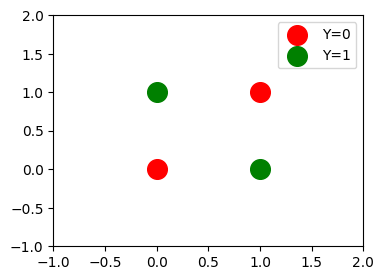

In [3]:
plt.figure(figsize=(4, 3))
plt.scatter([0,1],[0,1] , c = 'red', s = 200)
plt.scatter([0,1],[1,0] , c = 'green', s = 200)
plt.legend(["Y=0" , "Y=1"])
plt.ylim(-1,2)
plt.xlim(-1,2)
plt.show()

In [4]:
weight = np.random.rand(3,3)
weight

array([[0.43626287, 0.50882354, 0.54227053],
       [0.0404217 , 0.32741515, 0.95013741],
       [0.54534348, 0.97369569, 0.54927475]])

In [5]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [6]:
# plotting the decision boundary
def plot(epoch):
    # node 1 (o_11)
    m1 = -(weight[0][1]/weight[0][2])
    c1 = -(weight[0][0]/weight[0][2])
    x_input1 = np.linspace(-3, 3, 100)
    y_input1 = m1 * x_input1 + c1

     # node 2 (o_12)
    m2 = -(weight[1][1]/weight[1][2])
    c2 = -(weight[1][0]/weight[1][2])
    x_input2 = np.linspace(-3, 3, 100)
    y_input2 = m2 * x_input2 + c2

    plt.figure(figsize=(4, 3))
    plt.plot(x_input1, y_input1, color='green', linewidth=3) # line created by o_11
    plt.plot(x_input2, y_input2, color='green', linewidth=3) # line created by o_12
    plt.scatter([0,1],[0,1] , c = 'red', s = 200)
    plt.scatter([0,1],[1,0] , c = 'green', s = 200)
    #plt.suptitle(f'epoch {epoch+1}')
    plt.ylim(-1, 2)
    plt.xlim(-1, 2)

    plt.show()

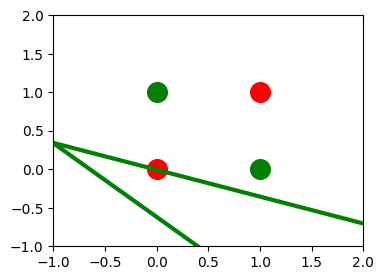

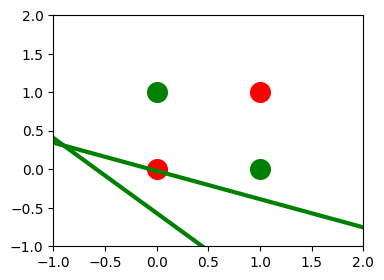

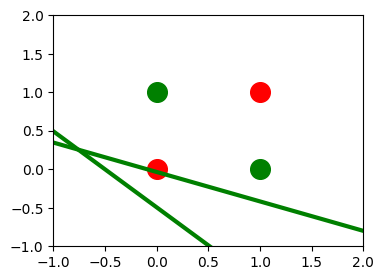

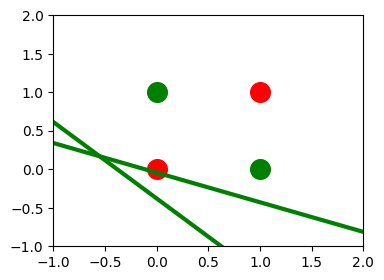

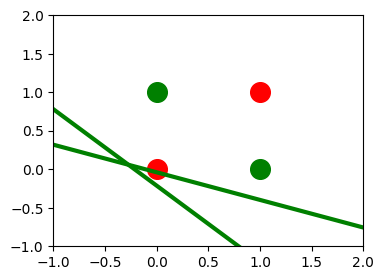

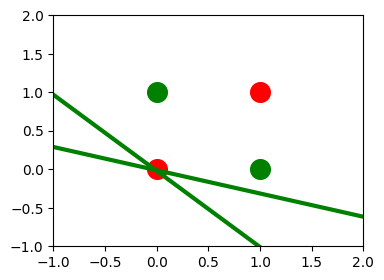

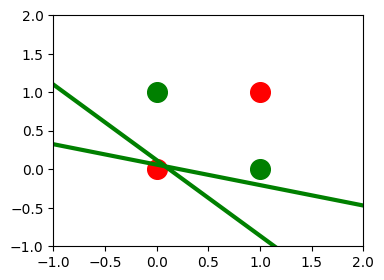

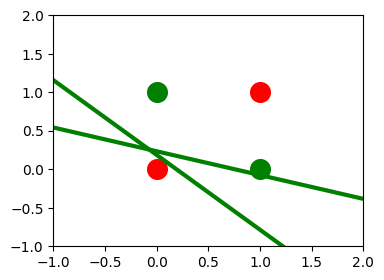

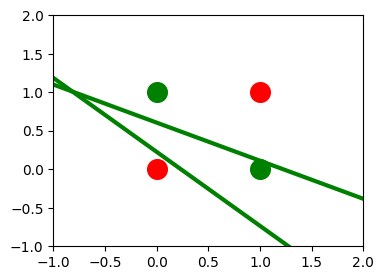

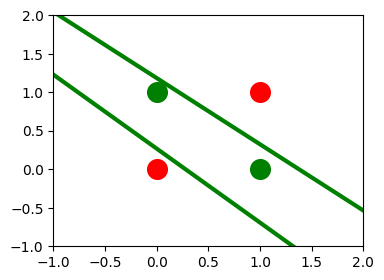

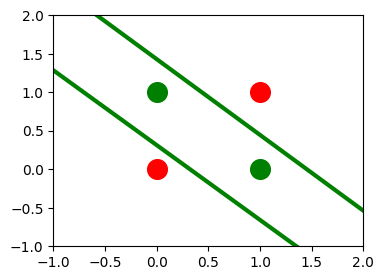

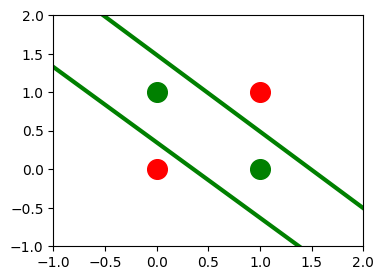

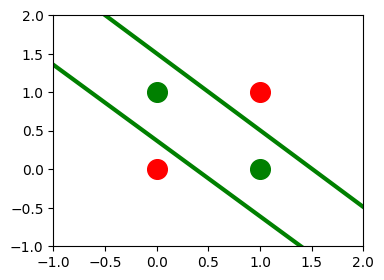

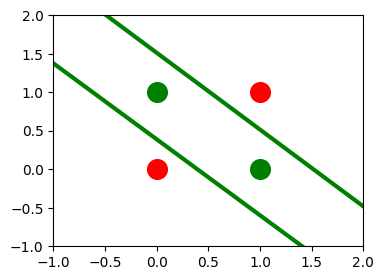

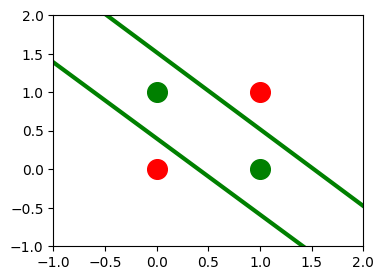

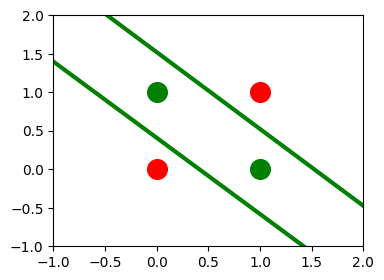

In [7]:
epochs = 20000
lr = 0.01 

for epoch in range(epochs):
    loss = []
    for i in range(X.shape[0]):

        # forward propagation
        x = np.insert(X[i], 0, 1)
        z_11 = np.dot(x, weight[0]) # x1*w111 + x2*w121 + b11
        o_11 = sigmoid(z_11) 

        z_12 = np.dot(x, weight[1]) # x1*w112 + x2*w122 + b12
        o_12 = sigmoid(z_12)

        z_21 = np.dot([1, o_11, o_12], weight[2]) # o11*w211 + o12*w221
        y_hat = sigmoid(z_21)

        # back propagation
        weight[2][0] = weight[2][0] + (lr * (y[i] - y_hat))
        weight[2][1] = weight[2][1] + (lr * (y[i] - y_hat)*o_11)
        weight[2][2] = weight[2][2] + (lr * (y[i] - y_hat)*o_12) 

        weight[0][0] = weight[0][0] + (lr * (y[i] - y_hat)*weight[2][1]*o_11*(1 - o_11))
        weight[0][1] = weight[0][1] + (lr * (y[i] - y_hat)*weight[2][1]*o_11*(1 - o_11)*x[1])
        weight[0][2] = weight[0][2] + (lr * (y[i] - y_hat)*weight[2][1]*o_11*(1 - o_11)*x[2])

        weight[1][0] = weight[1][0] + (lr * (y[i] - y_hat)*weight[2][2]*o_12*(1 - o_12))
        weight[1][1] = weight[1][1] + (lr * (y[i] - y_hat)*weight[2][2]*o_12*(1 - o_12)*x[1])
        weight[1][2] = weight[1][2] + (lr * (y[i] - y_hat)*weight[2][2]*o_12*(1 - o_12)*x[2])

        loss_function = -(y[i]*np.log(y_hat) + (1-y[i])*np.log(1-y_hat)) # log loss
        loss.append(loss_function)
  
    if np.array(loss).mean() > 0.05:

        if (epoch + 1) % 1000 == 0: 
            #print(f'epoch : {epoch+1} ; loss {np.array(loss).mean()}')
            plot(epoch)
